Classify Handwritten Digits
---

For this example I have created a simple dataset in Gimp. The dataset contains images of digits in english. Our task is to create a simple model that can recognize these images.

In [1]:
# These are all the modules we'll be using
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import ndimage
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
# Environment variables
DATASET_TRAIN = 'train'
DATASET_TEST = 'test'

At first, we shall check if our dataset looks ok by displaying some of the images.

In [3]:
image_dirs_train = [
    os.path.join(DATASET_TRAIN, d) for d in sorted(os.listdir(DATASET_TRAIN))
    if os.path.isdir(os.path.join(DATASET_TRAIN, d))
    ]

image_dirs_test = [
    os.path.join(DATASET_TEST, d) for d in sorted(os.listdir(DATASET_TEST))
    if os.path.isdir(os.path.join(DATASET_TEST, d))
    ]

In [4]:
nsamples_per_class = 3

for subdir_idx in np.arange(len(image_dirs_train)):
    for idx in np.arange(nsamples_per_class):
        sample_dir = image_dirs_train[subdir_idx]
        image_files = os.listdir(sample_dir)
        
        fn = os.path.join(sample_dir, image_files[np.random.randint(len(image_files))])
        display(Image(filename=fn))

Now load the dataset and split the samples into two separate sets for training and testing.

In [5]:
image_size = 16

train_images_per_class = 10
test_images_per_class = 4

dataset_train = np.ndarray(shape=(len(image_dirs_train)*train_images_per_class, image_size, image_size),
                           dtype=np.float32)
dataset_test = np.ndarray(shape=(len(image_dirs_test)*test_images_per_class, image_size, image_size),
                          dtype=np.float32)

labels_train = np.ndarray(len(image_dirs_train)*train_images_per_class, dtype=np.float32)
labels_test = np.ndarray(len(image_dirs_test)*test_images_per_class, dtype=np.float32)

# Load training images
num_images = 0

for subdir_idx in np.arange(len(image_dirs_train)):
    sample_dir = image_dirs_train[subdir_idx]
    sample_files = sorted(os.listdir(sample_dir))
    
    # TODO: Raise exception if number of images is less than train_images_per_class
    for file_idx in np.arange(train_images_per_class):
        fn = os.path.join(sample_dir, sample_files[file_idx])
        
        im_data = ndimage.imread(fn)
        dataset_train[num_images, :, :] = im_data
        labels_train[num_images] = subdir_idx
        num_images += 1

# Load test images
num_images = 0

for subdir_idx in np.arange(len(image_dirs_test)):
    sample_dir = image_dirs_test[subdir_idx]
    sample_files = sorted(os.listdir(sample_dir))
    
    # TODO: Raise exception if number of images is less than test_images_per_class
    for file_idx in np.arange(test_images_per_class):
        fn = os.path.join(sample_dir, sample_files[file_idx])
        
        im_data = ndimage.imread(fn)
        dataset_test[num_images, :, :] = im_data
        labels_test[num_images] = subdir_idx
        num_images += 1

Verify some images from the training dataset.

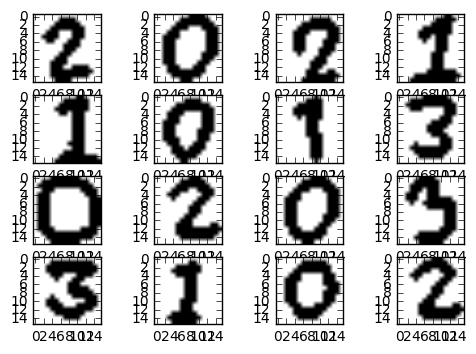

In [6]:
fig = plt.figure()
gs = gridspec.GridSpec(4, 4)

nsamples = 16

for idx in np.arange(nsamples):
    im = dataset_train[np.random.randint(len(dataset_train)), :, :]
    fig.add_subplot(gs[idx])
    plt.imshow(im, cmap='gray')

Now we can train our model using LogisticRegression from sklearn. First let us do that and later we shall try to device our own neural network.

In [7]:
def reshape(a):
    return a.reshape(a.shape[0], a.shape[1]*a.shape[2])

y = labels_train
X = reshape(dataset_train)
t = reshape(dataset_test)

C = 1.0
classifier = LogisticRegression(C=C, penalty='l1')
classifier.fit(X, y)
y_pred = classifier.predict(t)

classif_rate = np.mean(y_pred == labels_test) * 100
print('Classification rate: %f %%' % (classif_rate))

Classification rate: 93.750000 %
